# 1.Importing Packages

In [16]:
from qiskit import *
import numpy as np
from qiskit.tools.visualization import plot_histogram

Here  our intent it to capture the relative phase. but First let's undestand what's global and relative phase

Quick recap on those at accepted aanswer by Siddhant Singh @ <a href="https://quantumcomputing.stackexchange.com/questions/5125/what-is-the-difference-between-a-relative-phase-and-a-global-phase-in-particula#:~:text=Global%20phases%20are%20artefacts%20of,represent%20the%20same%20physical%20system.&text=On%20the%20other%20hand%2C%20relative,the%20core%20of%20quantum%20mechanics.">here</a>  


Setp 1: We take our $\ket{\psi}$ (the qubit whose phase we want to estimate) and use Quantum forrier transform(which uses Quantum kickback to capture the phase and map it on the n qubits)

Step 2: We apply inverse forrier transform to convert the forrier basis(frequency domain) to computational basis(Z basis) in order for us to measure the now captured phase.


In our example let's follow the qiskit textbook : <a href="https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html">link to it</a> 
    
<b>Note:</b> keep in mind that thi QPE gives us accurate results when these two conditions are true:<br>
    <ol>
    <li> $2^n\theta$ is an integer</li><br>
    <li> When our QC is a perfect QC i.e. without any gate errors or when we are using a simulator</li><br>
    </ol>

In our example case we're taking the case of  $\ket {\psi} = T\ket{1}$ and n=3 (thus first condition is satisfied) and since we'll be using a simulator we have no error issues.

T has $$\begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/8} \end{bmatrix}$$ <br>

And since our QPE circuit finds $\theta$ in $2i\pi\theta$ ,so in our case it would be $\theta = \frac {1}{8}$

# 2. Builing and Running the circuit   

## 2.1 Making $QFT^+$ block

In [12]:
def inverse_qft(qc,n):
    for qubit in range(n//2):
        qc.swap(qubit,n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cu1(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    return qc

## 2.2 Preparing the state, and QFT for n=3 

In [21]:
qpe=QuantumCircuit(4)
qpe.x(3)

qpe.barrier()

for q in range(3):
    qpe.h(q)

repetition=1
angle=np.pi/4
for count in range(3):
    for i in range(repetition):
        qpe.cu1(angle,count,3)
    repetition*=2

qpe.barrier()

## 2.3 Completing the circuit

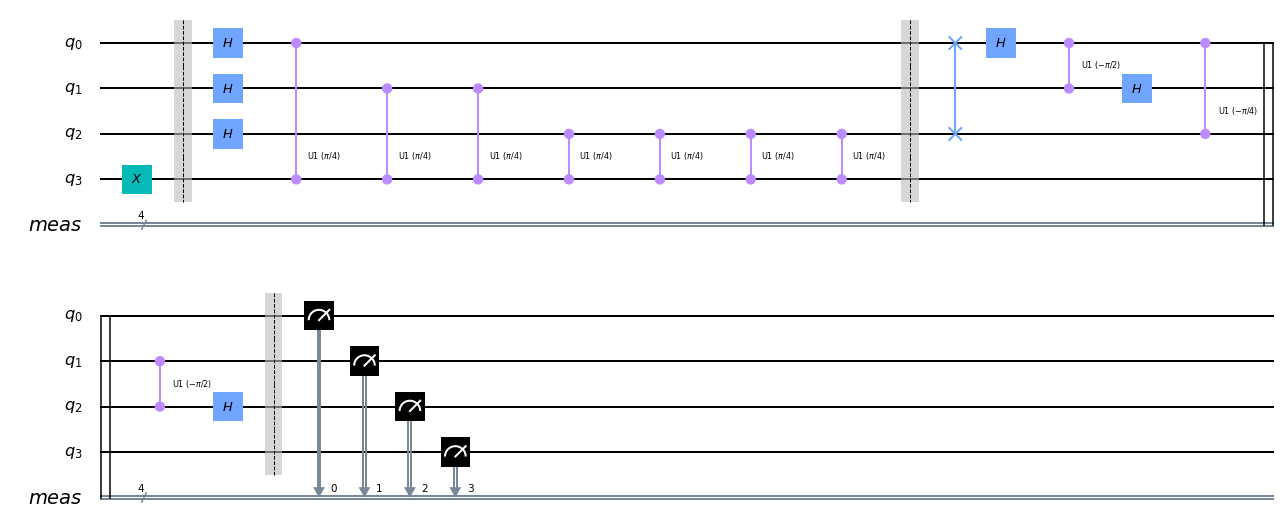

In [22]:
qpe=inverse_qft(qpe,3)

qpe.measure_all()
qpe.draw('mpl')

# 3. Running the circuit

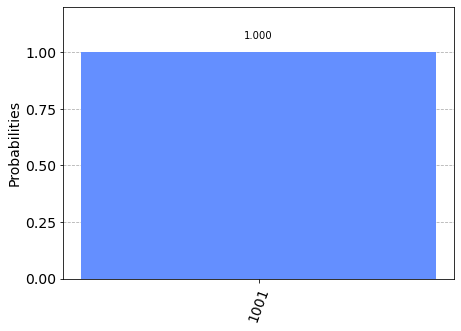

In [17]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

The ouptut we have gotten is $2^n \theta$ now to get the value of theta we'll have to divide it by $2^n$, and so $1/2^3 = 1/8$